# Тестирование приложений. Инструкция assert. Библиотеки unittest, pytest

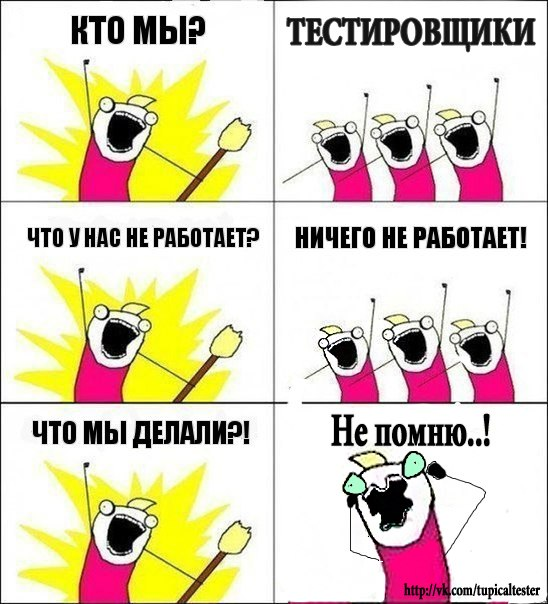

## Unit – тестирование

Уровни тестирования веб-приложений:

![Как должно быть](17/18-02.png)

Принципы автоматизации тестов

- Атомарность
- Независимость
- Изолированность/герметичность

In [0]:
# Атомарность
# Тесты должны быть атомарными, каждый из них должен проверять 
# ровно один тестовый случай. 
# Громоздкие и сложные тесты необходимо разбивать на несколько более мелких.

def test_add_smth():
    user = create_new_user(email='some@ema.il')	
    # user.register() # лишнее
    # user.auth() # лишнее
    smth = user.create_smth()
    smth.add()
    # assert user.is_authorized() # лишнее
    assert smth.is_added()
    # assert user.email == 'some@ema.il' # лишнее

### Независимость

```
test1 -> test2 -> test3
test2 -> test1 -> test3
test3 -> test2 -> test1
test1 -> test3 -> test2
test3 -> test1 -> test2
test2 -> test3 -> test1
```

### Изолированность/герметичность

![Изолированность](17/18-00.png)

![Изолированность](17/18-01.png)

## Как придумать тесты?

- Разбор тестируемоего метода
- Определение граничных значении
- Определение классов эквивалентности

> Какие тесты сделать для функции a / b?

## Инструменты для тестирования в Python

- Unittest
- Pytest

## Unittest

In [2]:
import unittest


class TestStringMethods(unittest.TestCase):
    def test_upper(self):
        self.assertEqual('foo'.upper(), 'FOO')

    def test_isupper(self):
        self.assertTrue('FOO'.isupper())
        self.assertFalse('Foo'.isupper())

    def test_split(self):
        s = 'hello world'
        self.assertEqual(s.split(), ['hello', 'world'])
        # check that s.split fails when the separator is not a string
        with self.assertRaises(TypeError):
            s.split(2)
          
    def something(self):
        1 / 0

### Запуск unittest

```
> python -m unittest tests_script.py
```

Подготовка состояния (фикстуры)

- setUp()
- tearDown()
- setUpClass()
- tearDownClass()
- setUpModule()
- tearDownModule()

In [ ]:
import unittest


class TestStringMethods(unittest.TestCase):
    def setUp(self):
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!SETUP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        
    def tearDown(self):
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!TEARDOWN!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        
    @classmethod
    def setUpClass(cls):
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!SETUP CLASS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        
    @classmethod
    def tearDownClass(cls):
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!TEARDOWN CLASS!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    
    def test_upper(self):
        self.assertEqual('foo'.upper(), 'FOO')

    def test_isupper(self):
        self.assertTrue('FOO'.isupper())
        self.assertFalse('Foo'.isupper())

    def test_split(self):
        s = 'hello world'
        self.assertEqual(s.split(), ['hello', 'world'])
        # check that s.split fails when the separator is not a string
        with self.assertRaises(TypeError):
            s.split(2)
          
    def something(self):
        1 / 0

Проверка результата

|Метод|Проверяет|Версия|
|:---|:---|:---:|
|assertEqual(a,b)|`a == b`||
|assertNotEqual(a,b)|`a != b`||
|assertTrue(x)|`bool(x) is True`||
|assertFalse(x)|`bool(x) is False`||
|assertIs(a, b)|`a is b`|3.1|
|assertIsNot(a, b)|`a is not b`|3.1|
|assertIsNone(x)|`x is None`|3.1|
|assertIsNotNone(x)|`x is not None`|3.1|
|assertIn(a, b)|`a in b`|3.1|
|asertNotIn(a, b)|`a not in b`|3.1|
|assertIsInstance(a, b)|`instance(a, b)`|3.2|
|assertNotIsInstance(a, b)|`not instance(a, b)`|3.2|

In [10]:
import unittest


class TestStringMethods(unittest.TestCase):
    def test_upper(self):
        self.assertEqual('foo'.upper(), 'FOO')

    def test_isupper(self):
        self.assertTrue('FOO'.isupper())
        self.assertFalse('Foo'.isupper())

    def test_split(self):
        s = 'hello world'
        self.assertEqual(s.split(), ['hello', 'world'])
        # check that s.split fails when the separator is not a string
        with self.assertRaises(TypeError):
            s.split(2)

Почему unittest не очень удобен:

- 1 класс – 1 тест
- Fixtures в формате setUp tearDown
- Скоуп фикстуры
- Приходится наследоваться если у тестов
одинаковый setUp
- Сложные assert

![скрин](17/18-03.png)

## Pytest

In [3]:
def test_upper():
    assert 'foo'.upper() == 'FOO'

def test_isupper():
    assert 'FOO'.isupper()
    assert not 'Foo'.isupper()

def test_split():
    s = 'hello world'
    assert s.split() == ['hello', 'world']

    try:
        s.split(1)
        assert False
    except TypeError:
        assert True

Подготовка состояния (фикстуры)

In [1]:
import pytest

@pytest.fixture(scope='function', autouse=False)
def f():
    print(1)
    yield
    print(2)

Проверка результата

<code>
    assert res is None
    assert res is False
    assert res == {}
    assert res == []
    assert isinstance(res, list)
</code>

```
> python -m pytest tests_script.py
```

In [17]:
import pytest


@pytest.fixture()
def f():
    print(1)


@pytest.mark.usefixtures('f')
def test_success():
    assert True


@pytest.mark.parametrize('a,b,res', [
    (5, 2, 2.5),
    (0, 2, 0),
    (4, 2, 2),
    (-4, 2, -2)
])
def test_div(a, b, res):
    assert a / b == res

## Антипаттерны

- Liar
- Giant
- Secret Catcher
- Enumerator
- Slowpoke

https://habr.com/ru/articles/43761/

### Liar

In [7]:
def test_some_smth():
    do_smth()
    assert True

### Giant

![Giant](17/18-05.png)

### The Secret Catcher

In [0]:
def test_smth_one_two_three():
    do_smth1()
    do_smth2()
    do_smth3()

### Enumerator

In [18]:
def test1():
    pass

def test2():
    pass

def test3():
    pass

### Slowpoke

In [19]:
def test_pokemon():
    do_smth1()
    time.sleep(N)
    assert True

## Тесты на тесты

Анализ покрытия:

- По файлам
- По классам
- По методам
- По строкам
- По ветвям

## Зачем писать тесты?

- Улучшение качества кода
- Облегчение внесения изменений
- Документация на продукт

###### Блокнот подготовлен по материалам Опрышко Александра

# Selenium

Установка: https://www.selenium.dev/downloads/

In [4]:
!pip install selenium


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [1]:
import selenium

In [11]:
from selenium import webdriver

browser = webdriver.Firefox()
browser.get('http://selenium.dev/')

In [33]:
import time

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


def test_interface():
    browser = webdriver.Firefox()
    time.sleep(10)
    browser.get("https://encrypted.google.com")
    assert "Google" in browser.title
    elem = browser.find_element(By.NAME, "q")
    elem.send_keys("Смешарики")
    elem.send_keys(Keys.ENTER)

    wait = WebDriverWait(browser, 100)

    wait.until(EC.presence_of_element_located((By.ID, "res")))

    time.sleep(5)
    browser.quit()